En este primer módulo de curso os proporcionamos el siguiente fichero de código que permite detectar puntos de interés en una imagen con SIFT y obtener su descripción también con SIFT

01_SIFT_visualization.py
Para poder probar este código os proporcionamos algunas imágenes de ejemplo extraídas del conjunto de imágenes completo que utilizaremos a lo largo de todo el curso

ImagenesSemana1.rar
# Ejercicios propuestos (básicos)
## Ejercicio 1

Analizad el código que os proporcionamos para ver cómo se realiza la detección y descripción de puntos de interés con SIFT utilizando las funciones de la librería opencv. Podéis consultar la documentación de opencv para obtener información más detallada acerca de los parámetros y la utilización de las funciones para detectar y describir puntos de interés. Aquí tenéis algunos enlaces directos a la documentación de opencv que os pueden ser de utilidad:

http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html#sift-intro
http://docs.opencv.org/2.4/modules/features2d/doc/common_interfaces_of_feature_detectors.html#
http://docs.opencv.org/2.4.11/modules/features2d/doc/common_interfaces_of_descriptor_extractors.html

In [1]:
import cv2
import numpy as np
import time

# Read image and convert to grayscale
imageName = './ImagenesSemana1/a0004.jpg'
ima=cv2.imread(imageName)
gray=cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)

# Create detector and descriptor structures to compute SIFT
detector=cv2.FeatureDetector_create('SIFT')
descriptor = cv2.DescriptorExtractor_create('SIFT')

# Detect keypoints with SIFT and sort them according to their response
print 'Extracting Keypoints'
init=time.time()
kpts=detector.detect(gray)
kpts = sorted(kpts, key = lambda x:x.response)

end=time.time()
print 'Extracted '+str(len(kpts))+' keypoints.'
print 'Done in '+str(end-init)+' secs.'
print ''

# Compute SIFT descriptor for all keypoints
print 'Computing SIFT descriptors'
init=time.time()
kpts,des=descriptor.compute(gray,kpts)
end=time.time()
print 'Done in '+str(end-init)+' secs.'

# Show result of detecting keypoints
im_with_keypoints = cv2.drawKeypoints(ima, kpts, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey()

AttributeError: 'module' object has no attribute 'FeatureDetector_create'

Primero de todo podemos comprobar que el código nos da errores ya que las funciones de detección de OpenCV han cambiado.

Usaremos matplotlib para visualizar las imégenes. 

El código quedaria de la siguente manera.

In [ ]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

# Read image and convert to grayscale
imageName = './ImagenesSemana1/a0004.jpg'
ima = cv2.imread(imageName)
gray = cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)

# Create detector and descriptor structures to compute SIFT
sift = cv2.xfeatures2d.SIFT_create()
#detector=cv2.FeatureDetector_create('SIFT')
#descriptor = cv2.DescriptorExtractor_create('SIFT')

# Detect keypoints with SIFT and sort them according to their response
print 'Extracting Keypoints'
init = time.time()
#kpts=detector.detect(gray)
kpts = sift.detect(gray, None)
kpts = sorted(kpts, key = lambda x:x.response)
end = time.time()
print 'Extracted '+str(len(kpts))+' keypoints.'
print 'Done in '+str(end-init)+' secs.'
print ''

# Compute SIFT descriptor for all keypoints
print 'Computing SIFT descriptors'
init = time.time()
#kpts,des=descriptor.compute(gray,kpts)
kpts, descs = sift.compute(gray, kpts)
end = time.time()
print 'Done in '+str(end-init)+' secs.'

# Show result of detecting keypoints
im_with_keypoints = cv2.drawKeypoints(ima, kpts, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imshow("Keypoints", im_with_keypoints)
#cv2.waitKey()
imgForMatPlotLib = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB)
plt.imshow(imgForMatPlotLib)
plt.title('Keypoints')
plt.show()

## Ejercicio 2

Ejecutad el código con varias de las imágenes que os proporcionamos o con otras imágenes cualquiera para observar el comportamiento de la detección de los puntos de interés en diferentes imágenes. Analizad las escalas de detección y la orientación de los puntos de interés detectados.


In [ ]:
import cv2
import numpy as np
import time
import os
from matplotlib import pyplot as plt

path = './ImagenesSemana1'
imageNames = os.listdir(path)

for imageName in imageNames:
    # Read image and convert to grayscale
    #imageName = './ImagenesSemana1/a0004.jpg'
    #ima=cv2.imread(imageName)
    ima = cv2.imread(path + '/' + imageName, flags=cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)

    # Create detector and descriptor structures to compute SIFT
    sift = cv2.xfeatures2d.SIFT_create()
    #detector=cv2.FeatureDetector_create('SIFT')
    #descriptor = cv2.DescriptorExtractor_create('SIFT')

    # Detect keypoints with SIFT and sort them according to their response
    print 'Extracting Keypoints'
    init = time.time()
    #kpts=detector.detect(gray)
    kpts = sift.detect(gray, None)
    kpts = sorted(kpts, key = lambda x:x.response)
    end = time.time()
    print 'Extracted '+str(len(kpts))+' keypoints.'
    print 'Done in '+str(end-init)+' secs.'
    print ''

    # Compute SIFT descriptor for all keypoints
    print 'Computing SIFT descriptors'
    init = time.time()
    #kpts,des=descriptor.compute(gray,kpts)
    kpts, descs = sift.compute(gray, kpts)
    end = time.time()
    print 'Done in '+str(end-init)+' secs.'

    # Show result of detecting keypoints
    im_with_keypoints = cv2.drawKeypoints(ima, kpts, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #cv2.imshow("Keypoints", im_with_keypoints)
    #cv2.waitKey()
    imgForMatPlotLib = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB)
    plt.imshow(imgForMatPlotLib)
    plt.title('Keypoints')
    plt.show()

## Ejercicio 3

Modificad el código que os proporcionamos para que en la llamada a la función cv2.drawKeypoints se visualicen únicamente los N puntos de interés más relevantes. Fijaos que, previamente, justo después de la detección, los puntos de interés quedan ordenados según su relevancia. Probad diferentes valores de N para analizar cuáles son los puntos de interés más relevantes que se detectan en la imagen.

In [ ]:
import cv2
import numpy as np
import time
import os
from matplotlib import pyplot as plt

path = './ImagenesSemana1'
imageNames = os.listdir(path)

for imageName in imageNames:
    # Read image and convert to grayscale
    #imageName = './ImagenesSemana1/a0004.jpg'
    #ima=cv2.imread(imageName)
    ima = cv2.imread(path + '/' + imageName, flags=cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)

    # Create detector and descriptor structures to compute SIFT
    sift = cv2.xfeatures2d.SIFT_create()
    #detector=cv2.FeatureDetector_create('SIFT')
    #descriptor = cv2.DescriptorExtractor_create('SIFT')

    # Detect keypoints with SIFT and sort them according to their response
    print 'Extracting Keypoints'
    init = time.time()
    #kpts=detector.detect(gray)
    kpts = sift.detect(gray, None)
    # only the N keypoints most relevant
    N = 100
    kpts = sorted(kpts, key = lambda x:x.response)[0:N]

    end = time.time()
    print 'Extracted '+str(len(kpts))+' keypoints.'
    print 'Done in '+str(end-init)+' secs.'
    print ''

    # Compute SIFT descriptor for all keypoints
    print 'Computing SIFT descriptors'
    init = time.time()
    #kpts,des=descriptor.compute(gray,kpts)
    kpts, descs = sift.compute(gray, kpts)
    end = time.time()
    print 'Done in '+str(end-init)+' secs.'

    # Show result of detecting keypoints
    im_with_keypoints = cv2.drawKeypoints(ima, kpts, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #cv2.imshow("Keypoints", im_with_keypoints)
    #cv2.waitKey()
    imgForMatPlotLib = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB)
    plt.imshow(imgForMatPlotLib)
    plt.title('Keypoints')
    plt.show()

# Ejercicios propuestos (avanzados)
## Ejercicio 4

En link siguiente:

http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html#matcher

tenéis algunos ejemplos que ilustran cómo se puede encontrar la correspondencia entre los puntos de interés más similares en dos imágenes. A partir de estos ejemplos, implementad el código necesario en python para realizar la correspondencia entre dos imágenes a partir de la detección y descripción de puntos de interés con SIFT, visualizar la correspondencia y calcular la distancia entre las dos imágenes tal como hemos explicado en el vídeo 5 de esta semana.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

path = './opencv_images/'

img1 = cv2.imread(path + 'box.png', 0)          # queryImage
img2 = cv2.imread(path + 'box_in_scene.png', 0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

plt.imshow(img3)
plt.show()


## Ejercicio 5

A partir del cálculo de la distancia entre dos imágenes que habéis implementado en el ejercicio anterior, implementad un clasificador por vecino más cercano que permita clasificar una imagen a partir de un conjunto de entrenamiento.

Para ello os proporcionamos un conjunto de entrenamiento que es un subconjunto de la base de datos de imágenes que utilizaremos a lo largo del curso. Se compone de 50 imágenes de 8 categorías diferentes. Las imágenes de cada categoría están en una carpeta diferente.

Train.rar

Además os proporcionamos también un conjunto de evaluación compuesto por 20 imágenes de cada categoría.

Test.rar

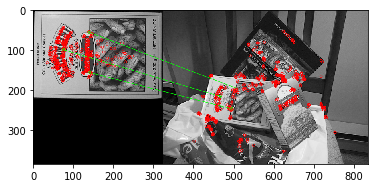

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

path = './opencv_images/'

img1 = cv2.imread(path + 'box.png', 0)          # queryImage
img2 = cv2.imread(path + 'box_in_scene.png', 0) # trainImage

# Initiate SIFT detector
sift = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(np.asarray(des1,np.float32),np.asarray(des2,np.float32),k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in xrange(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,)
plt.show()

## Ejercicio 6

Implementad el código necesario en python para determinar la exactitud (accuracy) del clasificador que habéis implementado en el ejercicio anterior a partir del conjunto de entrenamiento y evaluación que os hemos proporcionado.
